In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("dark_background")

import ai_prentice_wasserstein

from functools import partial
from time import time

import warnings
warnings.filterwarnings("ignore", message="using precomputed metric; inverse_transform will be unavailable")

In [2]:
pendulum_data = np.load("trajectories/pendulum.npz")
data = pendulum_data["data"]

In [3]:
Predictor = ai_prentice_wasserstein.DimensionalityPredictor("pendulum")

In [4]:
t_start = time()
Predictor.fit(data)
t_end = time()
print(f"time: {np.round(t_end - t_start, 3)}")

Normalizing
Computing distance matrix
Embedding data and computing scores
Computing the dimensionality
time: 139.376


In [5]:
print(f"Dimensionality of the pendulum data: {Predictor.dimensionality}")

Dimensionality of the pendulum data: 1


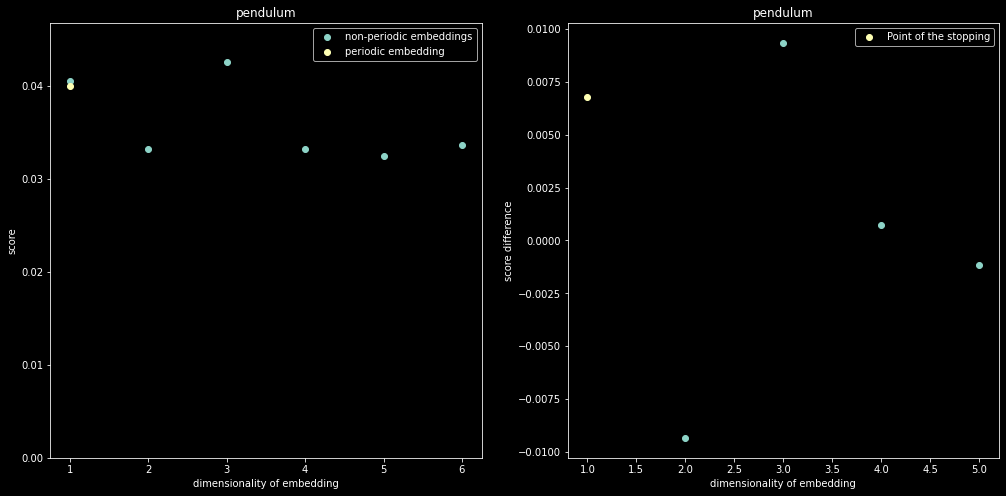

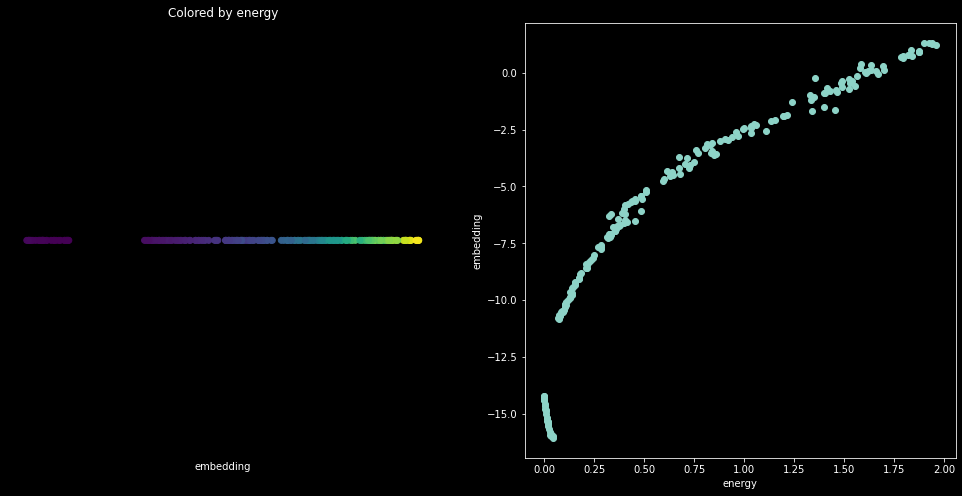

In [6]:
Predictor.show_results(plt, pendulum_data["params"], ["energy"])